 # WOFOST Implementation Example for Fields of the World

 © 2021 Agrimetrics

 [Fields of the World](https://app.agrimetrics.co.uk/catalog/data-sets/ae7ea6be-9731-46fc-9e01-ca71a8aca871/overview) is an Open Access dataset created by Agrimetrics and supported by Microsoft's [AI for Earth](https://www.microsoft.com/en-gb/ai/ai-for-earth) programme.
 These Jupyter notebooks walk you through running a WOFOST simulation using Fields of the World data.
 WOFOST is a crop growth and production simulation model for annual field crops, developed at Wageningen University and Research (de Wit *et al.* 2019).
 WOFOST simulates crop growth that is then used to predict crop development over time and crop yields.
 Specifically, this notebook will run a WOFOST simulation for a single field using weather and soil data from the [Fields of the World](https://app.agrimetrics.co.uk/catalog/data-sets/ae7ea6be-9731-46fc-9e01-ca71a8aca871/overview) dataset.


 Here we are using a Python package [PCSE (Python Crop Simulation Environment)](https://pcse.readthedocs.io/en/stable/), which can implement various WOFOST models.

 Running PCSE/WOFOST on custom input data then requires 3 key things:

 1. Parameter values for different components of the WOFOST model; specifically those representing the crop and soil.
 2. Driving variables representing changing environmental conditions, specifically weather here.
 3. Agromanagement actions that specify farm activities that will take place on the field that is simulated by PCSE.


 These are all set up as part of the scripts below.


 ## 1. Import required libraries

 The first step is to install the various libraries that we need. This includes a number of modules from PCSE.

In [1]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use("seaborn")

import pcse
from pcse.base import ParameterProvider
from pcse.fileinput import YAMLCropDataProvider
from pcse.models import Wofost71_WLP_FD
from pcse.util import WOFOST71SiteDataProvider

import import_ipynb
from agri_wofost import agri_wofost_soil_data, agri_wofost_weather_data, agri_wofost_management_data

print("This notebook was built with:")
print(f"python version: {sys.version}")
print(f"PCSE version: {pcse.__version__}")


importing Jupyter notebook from agri_wofost.ipynb
importing Jupyter notebook from agri_graphql.ipynb
This notebook was built with:
python version: 3.9.2 (default, Feb 28 2021, 17:03:44) 
[GCC 10.2.1 20210110]
PCSE version: 5.4.2


 ## 2. Define the field and the year
 We next define the field using the Agrimetrics agricultural field identifier and the year for the simulation. The agricultural field identifiers can be obtained by running GraphQL or Field Search APIs explained in our [Developer documentation](https://developer.agrimetrics.co.uk/docs/services/). Here we just provide one of the IDs.

In [2]:
field_id = "agfd:n8k-1EHPGqt_RZasjRYCnQ"
country = "FR"
year = 2017


 ## 3. Selecting crop specific parameters

 To access WOFOST crop parameter files we use the `YAMLCropDataProvider()` to pull YAML files from the package's [GitHub](https://github.com/ajwdewit/WOFOST_crop_parameters) repository.

 Our crop and variety of interest is then activated (Winter_wheat_102 for southern UK).

 See also the PCSE [Quickstart](https://pcse.readthedocs.io/en/stable/quickstart.html#an-interactive-pcse-wofost-session) for further documentation.

In [3]:
cropdata = YAMLCropDataProvider()
cropdata.set_active_crop("wheat", "Winter_wheat_102")
print(cropdata)


YAMLCropDataProvider - current active crop 'wheat' with variety 'Winter_wheat_102'
Available crop parameters:
 {'CO2EFFTB': [40.0, 0.0, 360.0, 1.0, 720.0, 1.11, 1000.0, 1.11, 2000.0, 1.11], 'CO2TRATB': [40.0, 0.0, 360.0, 1.0, 720.0, 0.9, 1000.0, 0.9, 2000.0, 0.9], 'CO2AMAXTB': [40.0, 0.0, 360.0, 1.0, 720.0, 1.6, 1000.0, 1.9, 2000.0, 1.9], 'TBASEM': 0.0, 'TEFFMX': 30.0, 'TSUMEM': 120, 'IDSL': 2, 'DLO': 16.3, 'DLC': 8.0, 'TSUM1': 853, 'TSUM2': 975, 'DTSMTB': [0.0, 0.0, 30.0, 30.0, 45.0, 30.0], 'DVSI': 0.0, 'DVSEND': 2.0, 'VERNBASE': 9.0, 'VERNSAT': 44.0, 'VERNDVS': 0.3, 'VERNRTB': [-8.0, 0.0, -4.0, 0.0, 3.0, 1.0, 10.0, 1.0, 17.0, 0.0, 20.0, 0.0], 'TDWI': 50.0, 'RGRLAI': 0.0082, 'SLATB': [0.0, 0.00212, 0.5, 0.00212, 2.0, 0.00212], 'SPA': 0.0, 'SSATB': [0.0, 0.0, 2.0, 0.0], 'SPAN': 31.3, 'TBASE': 0.0, 'KDIFTB': [0.0, 0.6, 2.0, 0.6], 'EFFTB': [0.0, 0.45, 40.0, 0.45], 'AMAXTB': [0.0, 35.83, 1.0, 35.83, 1.3, 35.83, 2.0, 4.48], 'TMPFTB': [0.0, 0.01, 10.0, 0.6, 15.0, 1.0, 25.0, 1.0, 35.0, 0.0],

 ## 4. Define site parameters and Agromanagement conditions
 We next define parameters specific to the site and management. We largely use default parameter values for simplicity, however we need to set the `CO2` argument set to the global average atmospheric carbon dioxide level (ppm) as at 2019 ([Lindsey, R. 2020](https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)).

 The parameters are locally cached in a YAML file (```./data/<field id>/2017_management.yaml```) for future use.

In [4]:
sitedata = WOFOST71SiteDataProvider(WAV=100, CO2=409.8)
print(sitedata)


{'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 100.0, 'SMLIM': 0.4, 'CO2': 409.8}


In [5]:
agromanagement = agri_wofost_management_data(field_id, year)
print(agromanagement)


!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2016-09-15:
    CropCalendar:
      crop_end_date: null
      crop_end_type: maturity
      crop_name: wheat
      crop_start_date: 2016-10-15
      crop_start_type: sowing
      max_duration: 350
      variety_name: Winter_wheat_102
    StateEvents: null
    TimedEvents: null



 ## 5. Retrieve Agrimetrics weather data

 Daily weather variables are needed for running the WOFOST simulation - see [Weather data in PCSE](https://pcse.readthedocs.io/en/stable/reference_guide.html#weather-data-providers) for further details. We retrieve the past year's daily weather data for the field by querying the Agrimetrics GraphQL API. The returned data is reformatted to be compatible with the WOFOST model (see [CSVWeatherDataProvider](https://pcse.readthedocs.io/en/stable/code.html#csvweatherdataprovider)) and locally cached (```./data/<field id>/weather.csv```) for future use.

In [6]:
wdp = agri_wofost_weather_data(field_id, f"{year-1}-09-15", f"{year}-09-15")


 ## 6. Retrieve Agrimetrics soil data

 Next we create a WOFOST soil file for the field using Agrimetrics (top) soil texture and chemical properties data - retieved through the GraphQL API.

 The required physical soil characteristics (soil water retention and hydraulic conductivity) are calculated using the equations reported by Saxton and Rawls (2006).

 The generated .SOIL file is locally cached (```./data/<field id>/soil.SOIL```) for future use.

In [7]:
soildata = agri_wofost_soil_data(field_id, country)


 ## 7. Combine parameters into single set

 PCSE models expect a single set of parameters: Sitedata, cropdata, soildata are encapsulated into a single object
 combining them using the ParameterProvider function in PCSE package.

In [8]:
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)


 ## 8. Running WOFOST

 We run a WOFOST implementation designed for water limited scenarios that have freely-draining soils, for a more realistic
 output than potential production and plot results.

 Notable outputs include:
 * DVS - Development stage
 * LAI - Leaf Area Index
 * SM - Volumetric root zone soil moisture
 * TWSO - Total weight of storage organs (kg ha<sup>-1</sup>)
 * RD - Rooting depth (cm)

In [9]:
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()

output = wofsim.get_output()
df_results = pd.DataFrame(output)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

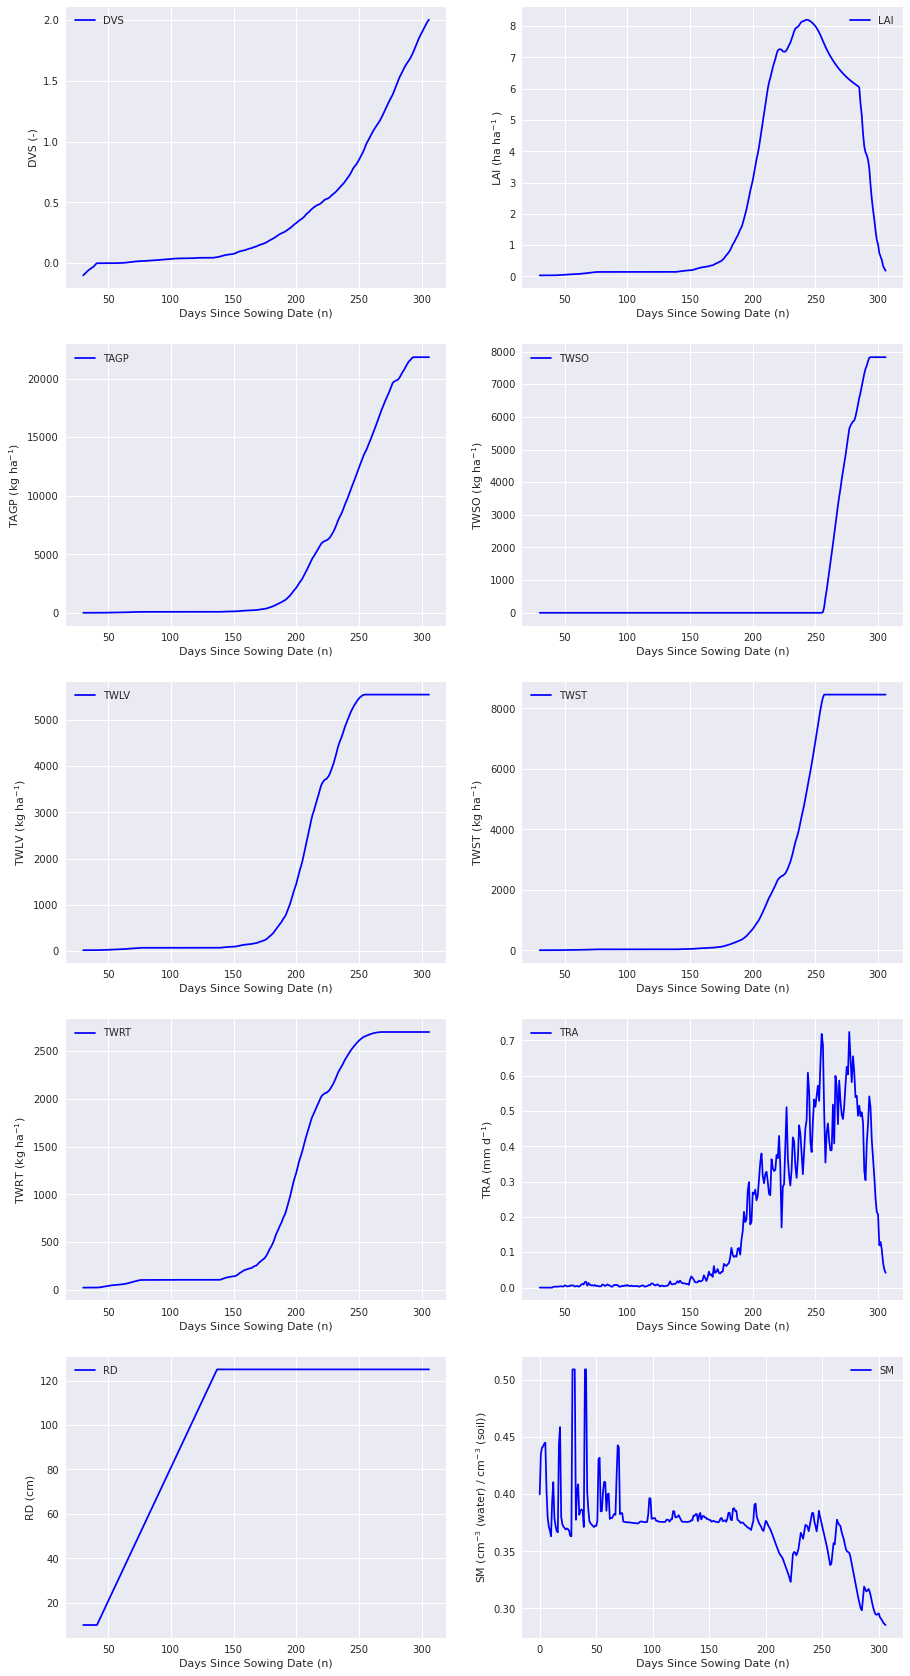

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(15, 30))

variables = ["DVS", "LAI", "TAGP", "TWSO", "TWLV", "TWST", "TWRT", "TRA", "RD", "SM", "WWLOW"]
units = [
    "-",
    "ha $\\rm{ha^{-1}}$ ",
    "kg $\\rm{ha^{-1}}$",
    "kg $\\rm{ha^{-1}}$",
    "kg $\\rm{ha^{-1}}$",
    "kg $\\rm{ha^{-1}}$",
    "kg $\\rm{ha^{-1}}$",
    "mm $\\rm{d^{-1}}$",
    "cm",
    "$\\rm{cm^{-3}}$ (water) / $\\rm{cm^{-3}}$ (soil)",
    "cm",
]

for var, unit, ax in zip(variables, units, axes.flatten()):
    ax.plot(df_results.index, df_results[var], label=var, color="b")
    ax.set_xlabel("Days Since Sowing Date (n)")
    ax.set_ylabel(var + " (" + unit + ")")
    ax.legend()

plt.tight_layout


# References

 de Wit, Allard, Hendrik Boogaard, Davide Fumagalli, Sander Janssen, Rob Knapen, Daniel van Kraalingen, Iwan Supit, Raymond van der Wijngaart, and Kees van Diepen. "25 years of the WOFOST cropping systems model." Agricultural Systems 168 (2019): 154-167.

 K.E.Saxton & W.J.Rawls. "Soil Water Characteristic Estimates by Texture and Organic Matter for Hydrologic Solutions." Soil Science Society Of America Journal, Vol. 70.